# Predict and Explain Error Analysis

This notebook was used to analyze the performance of our BART and T5 model
on the sub-task: predict and explain.

BART_bart_scores.pk = BartScores for our BART model on all test sentences (calculated in BART-BARTscores.ipynb)
T5_bart_scores.pk = BartScores for our T5 model on all test sentences (calculated in BART-T5scores.ipynb)
BART-input.pk = tokenize concatenation of the premises and hypothesis to link to the Bartscores


In [21]:
# Read BART scores for BART model and T5 model

import pickle as pk
import pandas as pd
import matplotlib

with open(r'../model_evaluation/pickles/BART_bart_scores.pk', "rb") as f:
    bart = pk.load(f)

with open(r'../model_evaluation/pickles/T5_bart_scores.pk', "rb") as f:
    t5 = pk.load(f)

with open(r'../model_evaluation/pickles/BART-input.pk', "rb") as f:
    inp = pk.load(f)

def score_df(scores):
    generated, gold, BARTscore = tuple(zip(*scores))
    return pd.DataFrame({
        'generated': generated,
        'gold': gold,
        'BART score': BARTscore,
        'input': inp
    }).sort_values(by='BART score', ascending=False).reset_index(drop=True)

bart = score_df(bart)
t5 = score_df(t5)

In [22]:
def print_examples(df):
    for idx, row in df.iterrows():
        print(f"INPUT      {row['input']}")
        print(f"GOLD       {row['gold']}")
        print(f"GENERATED  {row['generated']}")
        print(f"SCORE      {row['BART score']}")
        print()

def analyze(df):
    print(">>> SCORES")
    print(df['BART score'].describe(), '\n')

    print(">>> EXAMPLES: BEST 3\n")
    print_examples(df.head(3))

    print(">>> EXAMPLES: MEDIAN\n")
    print_examples(df[df['BART score'].between(df['BART score'].median(), 0)].tail(3))

    print(">>> EXAMPLES: WORST 3\n")
    print_examples(df.tail(3))

    print(">>> FREQUENCY DISTRIBUTION")
    ax = bart.plot.hist(
        bins=30,
        figsize=(12, 8),
        color='#2E8B57',
        zorder=2,
        rwidth=0.9,
    )
    ax.set_ylabel('Frequency', fontsize=20)
    ax.legend(loc='upper left', prop={'size': 20})
    ax.tick_params(axis='both', labelsize=18)

>>> SCORES
count    9824.000000
mean       -2.022596
std         0.860022
min        -5.872152
25%        -2.572144
50%        -1.967432
75%        -1.377736
max        -0.130821
Name: BART score, dtype: float64 

>>> EXAMPLES: BEST 3

INPUT      An Indian woman is dancing with her partner.</s>A woman is moving.
GOLD       0 Dancing is a form of moving.
GENERATED  0 Dancing is a form of moving.
SCORE      -0.13082095980644226

INPUT      Three women sit at a table, taking notes from three identical magazines.</s>Three women are reading and writing.
GOLD       0 Taking notes implies reading and writing.
GENERATED  0 Taking notes implies reading and writing.
SCORE      -0.14433448016643524

INPUT      Three puppies are in the tub being sprayed with water by a person.</s>Animals are in a tub.
GOLD       0 Puppies are animals.
GENERATED  0 Puppies are animals.
SCORE      -0.15144097805023193

>>> EXAMPLES: MEDIAN

INPUT      A boy in swimming trunks wades out into the water.</s>The young s

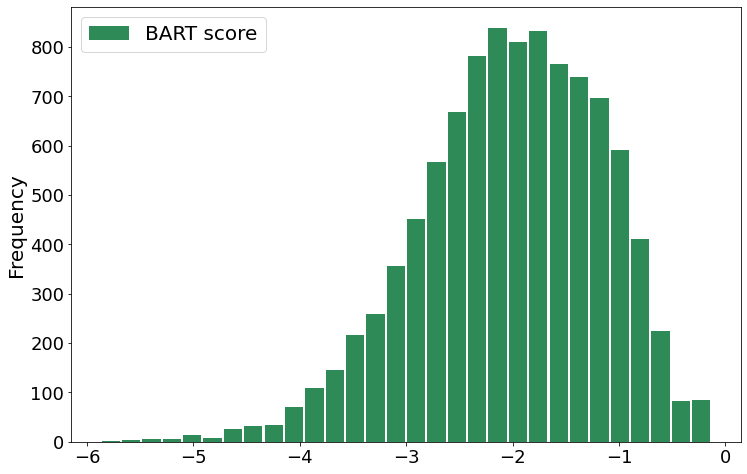

In [23]:
analyze(bart)

>>> SCORES
count    9824.000000
mean       -2.056793
std         0.869111
min        -5.697746
25%        -2.643428
50%        -2.017062
75%        -1.390397
max        -0.173038
Name: BART score, dtype: float64 

>>> EXAMPLES: BEST 3

INPUT      Villagers pulling in the fish boat.</s>There are people pulling a boat.
GOLD       Villagers are people.
GENERATED  Villagers are people.
SCORE      -0.1730376034975052

INPUT      A land rover is being driven across a river.</s>A vehicle is crossing a river.
GOLD       A land rover is a vehicle.
GENERATED  A land rover is a vehicle.
SCORE      -0.20455719530582428

INPUT      Two racers race on motorcycles.</s>Two people are racing.
GOLD       Racers are people.
GENERATED  Racers are people.
SCORE      -0.20692968368530273

>>> EXAMPLES: MEDIAN

INPUT      A bearded man with a backpack on his back holding a tripod in front of a rocky creek and bridge.</s>The man was taking pictures of nature.
GOLD       It is only mentioned that the man has a

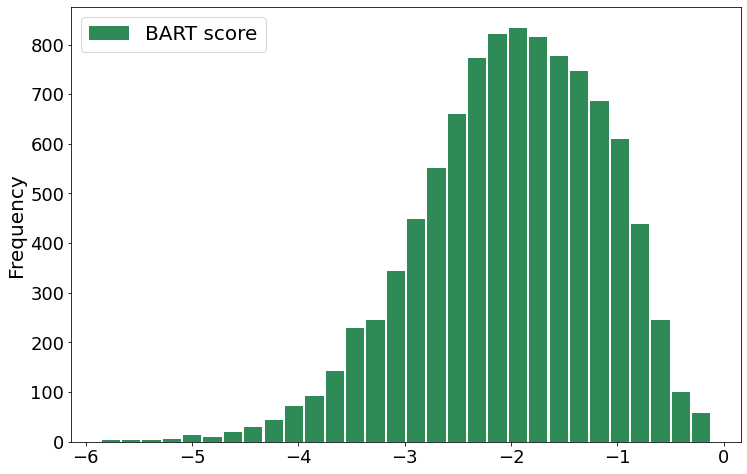

In [46]:
analyze(t5)